<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import scipy as sp
import polars as pl
import seaborn as sns
%matplotlib inline

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [2]:
asset_price = pd.read_csv("asset_price_data.csv")
asset_info = pd.read_csv("asset_information_data.csv")
port_weight = pd.read_csv("portfolio_weights.csv")

df_asset_price = asset_price.copy()
df_asset_info = asset_info.copy()
df_port_weight = port_weight.copy()

### Data Exploration

In [3]:
df_asset_info

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


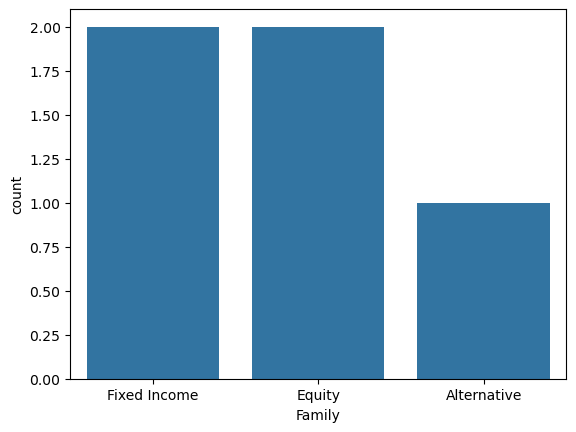

In [8]:
sns.countplot(x=df_asset_info["Family"])
plt.show()

- Two Fixed Income investment (Asset 1, Asset 2)
- Two equitiies (Asset 3, Asset 4)
- One Alternative (Asset 5)

In [9]:
df_asset_price.head(2)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41


In [10]:
df_asset_price.isnull().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

In [13]:
df_asset_price.shape

(783, 6)

In [11]:
df_port_weight.head(2)

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974


In [12]:
df_port_weight.isnull().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

In [14]:
df_port_weight.shape

(783, 6)

In [15]:
df_asset_price.shape == df_port_weight.shape

True

### Data Visualization

In [17]:
df_asset_price["date"] = pd.to_datetime(df_asset_price["date"])
df_port_weight["date"] = pd.to_datetime(df_port_weight["date"])

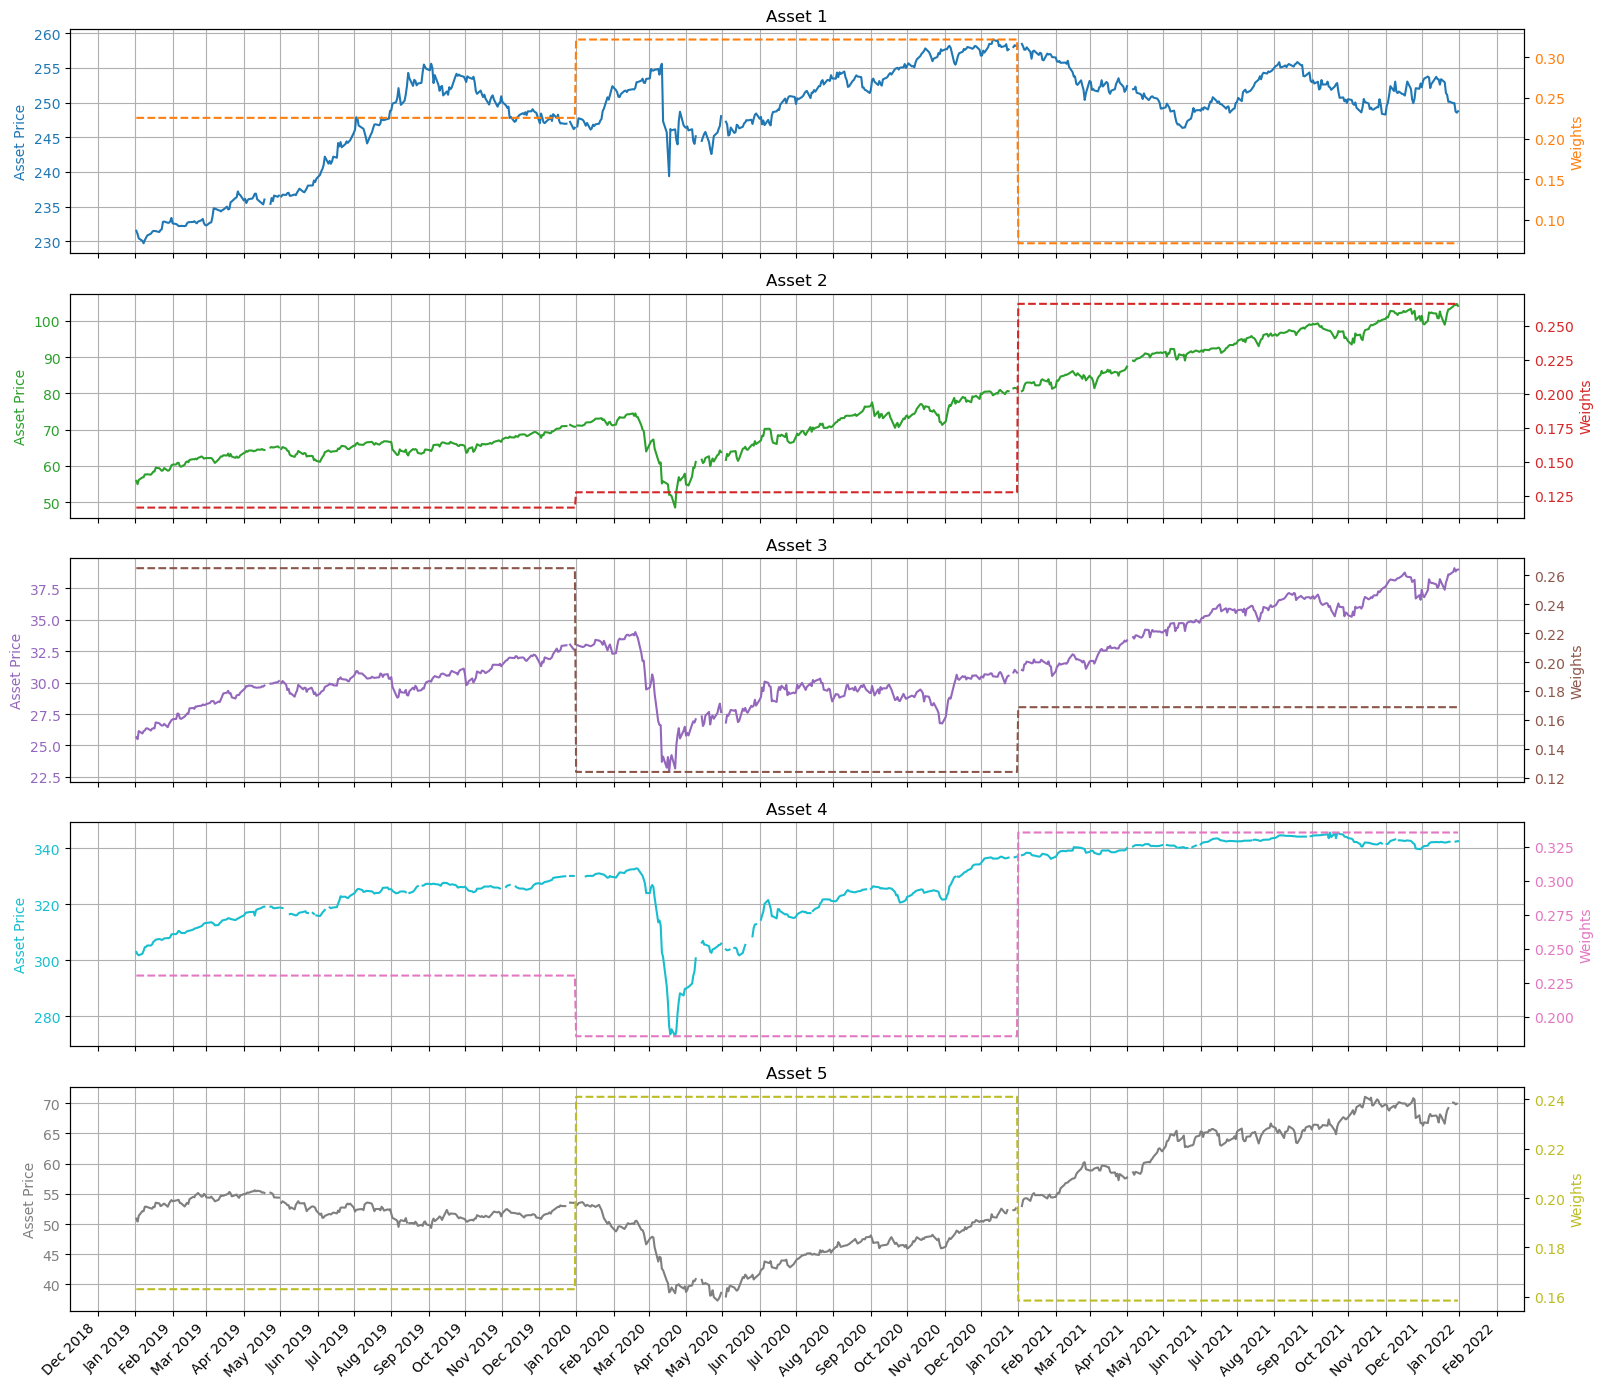

In [23]:
dates = df_asset_price["date"]
n = len(dates)

titles = ['Asset 1', 'Asset 2', 'Asset 3', 'Asset 4', 'Asset 5']
color_pairs = [
    ("#1f77b4", "#ff7f0e"),
    ("#2ca02c", "#d62728"),
    ("#9467bd", "#8c564b"),
    ("#17becf", "#e377c2"),
    ("#7f7f7f", "#bcbd22")
]
colors_primary = ['blue', 'orange', 'green', 'red', 'black']
colors_secondary = ['purple', 'brown', 'grey', 'pink', 'dimgrey']

# Create subplots
fig, axs = plt.subplots(5, 1, figsize=(16, 14), sharex=True)

# Loop through each subplot and add twin y-axis
for i in range(5):
    ax1 = axs[i]  # Primary axis
    ax2 = ax1.twinx()  # Secondary y-axis

    # Plot primary time series
    ax1.plot(dates, df_asset_price.iloc[:, i+1], color=color_pairs[i][0])
    ax1.set_ylabel('Asset Price', color=color_pairs[i][0])
    ax1.tick_params(axis='y', labelcolor=color_pairs[i][0])
    ax1.set_title(titles[i])

    # Plot secondary time series
    ax2.plot(dates, df_port_weight.iloc[:, i+1], color=color_pairs[i][1], linestyle='--')
    ax2.set_ylabel('Weights', color=color_pairs[i][1])
    ax2.tick_params(axis='y', labelcolor=color_pairs[i][1])

    # Grid for clarity
    ax1.grid(True)

# Formatting x-axis as monthly
months = mdates.MonthLocator()  # Monthly locator
months_fmt = mdates.DateFormatter('%b %Y')  # Month-Year format

axs[-1].xaxis.set_major_locator(months)
axs[-1].xaxis.set_major_formatter(months_fmt)

# Rotate x-axis labels for readability
plt.setp(axs[-1].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Common X-axis label
plt.xlabel('Date')
plt.tight_layout()
plt.show()

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>